In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = Gaussiana

$s_2$ = Laplace

$s_3$ = $\chi ^2 $

In [2]:
sources = np.loadtxt(source_path+'/'+'SeventhSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'SeventhMixMatrix.txt')

x = np.loadtxt(obs_path+'SeventhMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [3]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.21982964,  0.22175994,  0.20091167],
       [ 0.21982964,  1.        ,  0.14925733,  0.1626582 ],
       [ 0.22175994,  0.14925733,  1.        ,  0.26719856],
       [ 0.20091167,  0.1626582 ,  0.26719856,  1.        ]])

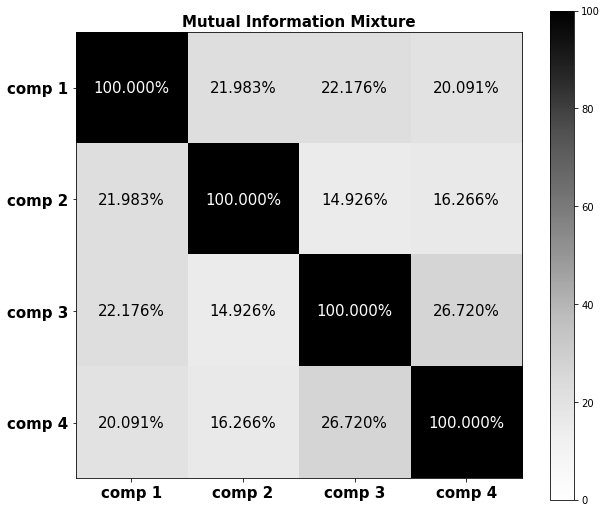

In [4]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run7_mix_MI_100',save=True)

In [5]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.06845391,  0.07537843,  0.02851334],
       [ 0.06845391,  1.        ,  0.20425808,  0.11699209],
       [ 0.07537843,  0.20425808,  1.        ,  0.08194153],
       [ 0.02851334,  0.11699209,  0.08194153,  1.        ]])

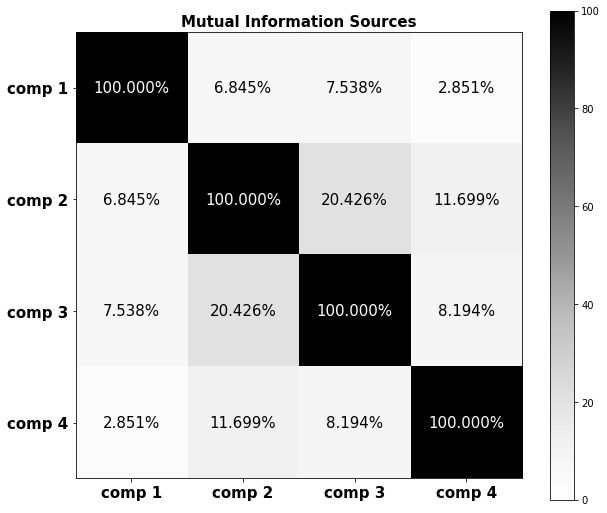

In [6]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run7_sources_MI_100',save=True)

In [7]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.36235287,  0.1284328 ,  0.54299663,  0.39992761],
         [ 0.38623145,  0.05910961,  0.50074758,  0.49189519],
         [ 0.26978456,  0.48171343,  0.86498865,  0.08957356],
         [ 0.30003429,  0.22313192,  0.63457054,  0.26622071]]),
  array([[ 0.48459104,  0.49997772,  0.34238548,  0.36474849],
         [ 0.13969793,  0.06346815,  0.39087977,  0.15998838],
         [ 0.4942301 ,  0.44379331,  0.74368808,  0.52640877],
         [ 0.44583459,  0.60061661,  0.08803643,  0.28568794]])],
 array([[ 0.42347195,  0.31420526,  0.44269106,  0.38233805],
        [ 0.26296469,  0.06128888,  0.44581368,  0.32594179],
        [ 0.38200733,  0.46275337,  0.80433836,  0.30799117],
        [ 0.37293444,  0.41187426,  0.36130349,  0.27595433]]),
 array([[ 0.25330991,  0.21275112,  0.28805107,  0.45484768],
        [ 0.32033931,  0.03173407,  0.21739457,  0.31966055],
        [ 0.25967347,  0.267603  ,  0.39619011,  0.08268895],
        [ 0.22024125,  0.10216058,  0.24668415,  0.2208

In [8]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 11
Time to converges the FastICA: 0.006 seconds


In [9]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 =  7.31215679978 E2 =  3.57505601802


In [10]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.18660958,  0.15768764,  0.02554   ],
       [ 0.18660958,  1.        ,  0.11674766,  0.05901603],
       [ 0.15768764,  0.11674766,  1.        ,  0.02271472],
       [ 0.02554   ,  0.05901603,  0.02271472,  1.        ]])

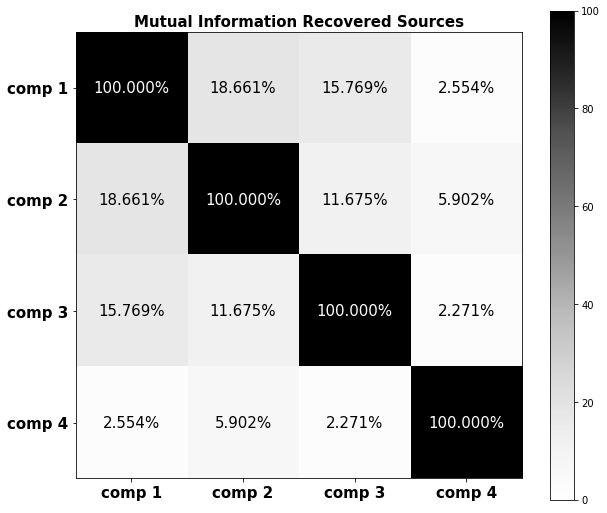

In [11]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run7_reco_MI_100',save=True)

In [12]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.0242322 ,  0.05290409,  0.02052104,  0.91795583],
       [ 0.33163058,  0.21048865,  0.24097284,  0.04998212],
       [ 0.18082534,  0.75172122,  0.0820046 ,  0.08983682],
       [ 0.24126209,  0.0869641 ,  0.23757088,  0.02548854]])

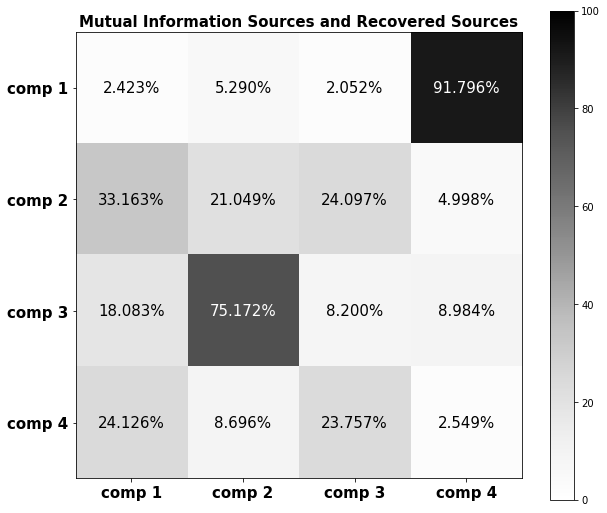

In [13]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run7_sourcesreco_MI_100',save=True)

In [18]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[3,:]
ordened_recovered_sources[1,:] = recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = -1*recovered_sources[2,:]


Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.91795583,  0.0242322 ,  0.05290409,  0.02052104],
       [ 0.04998212,  0.33163058,  0.21048865,  0.24097284],
       [ 0.08983682,  0.18082534,  0.75172122,  0.0820046 ],
       [ 0.02548854,  0.24126209,  0.0869641 ,  0.23757088]])

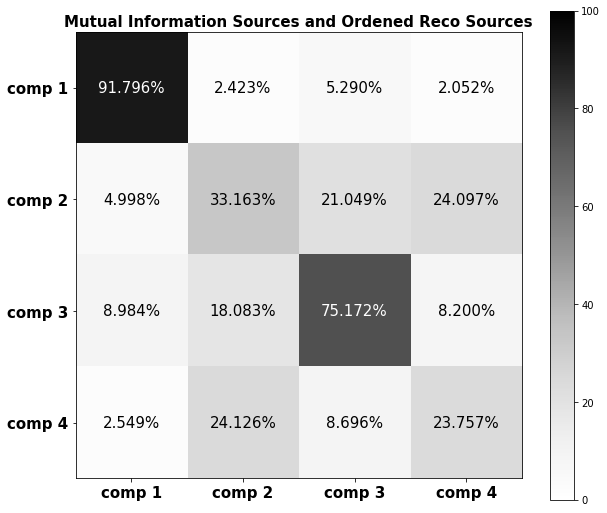

In [19]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run7_sourcesreco_ordened_MI_100',save=True)

In [20]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [21]:
SKL_div,JS_div

(array([[ 0.1321502 ,  0.44730838,  0.55741645,  0.34049314],
        [ 0.35914444,  0.1299348 ,  0.33554784,  0.41343652],
        [ 0.48142946,  0.34755764,  0.10171739,  0.64774645],
        [ 0.27368177,  0.43154293,  0.63052953,  0.30498833]]),
 array([[ 0.07484908,  0.19318391,  0.26725086,  0.16607536],
        [ 0.27816342,  0.08911628,  0.17092106,  0.1777435 ],
        [ 0.31348114,  0.1840051 ,  0.05076294,  0.33145775],
        [ 0.20402464,  0.27457129,  0.43783912,  0.1887659 ]]))

In [22]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.074849 &  0.193184 &  0.267251 &  0.166075 \\
1 &  0.278163 &  0.089116 &  0.170921 &  0.177743 \\
2 &  0.313481 &  0.184005 &  0.050763 &  0.331458 \\
3 &  0.204025 &  0.274571 &  0.437839 &  0.188766 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.132150 &  0.447308 &  0.557416 &  0.340493 \\
1 &  0.359144 &  0.129935 &  0.335548 &  0.413437 \\
2 &  0.481429 &  0.347558 &  0.101717 &  0.647746 \\
3 &  0.273682 &  0.431543 &  0.630530 &  0.304988 \\
\bottomrule
\end{tabular}



In [23]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[  1.10000000e+01,   0.00000000e+00,   0.00000000e+00],
       [  6.00000000e-03,   0.00000000e+00,   0.00000000e+00],
       [  7.31215680e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.57505602e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.49545475e+00,   0.00000000e+00,   0.00000000e+00]])

# Using 1000 stats

In [24]:
sources = np.loadtxt(source_path+'/'+'SeventhSource1000Stats.txt')

x = np.loadtxt(obs_path+'SeventhMixture1000Stats.txt')


In [25]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.07715367,  0.14535438,  0.11808775],
       [ 0.07715367,  1.        ,  0.06403126,  0.10693386],
       [ 0.14535438,  0.06403126,  1.        ,  0.15319561],
       [ 0.11808775,  0.10693386,  0.15319561,  1.        ]])

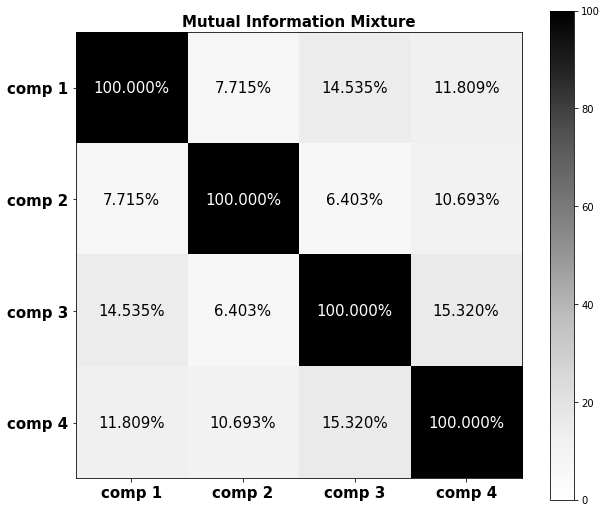

In [26]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run7_mix_MI_1k',save=True)

In [27]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.02471456,  0.02750104,  0.02072906],
       [ 0.02471456,  1.        ,  0.07674674,  0.07147426],
       [ 0.02750104,  0.07674674,  1.        ,  0.09208162],
       [ 0.02072906,  0.07147426,  0.09208162,  1.        ]])

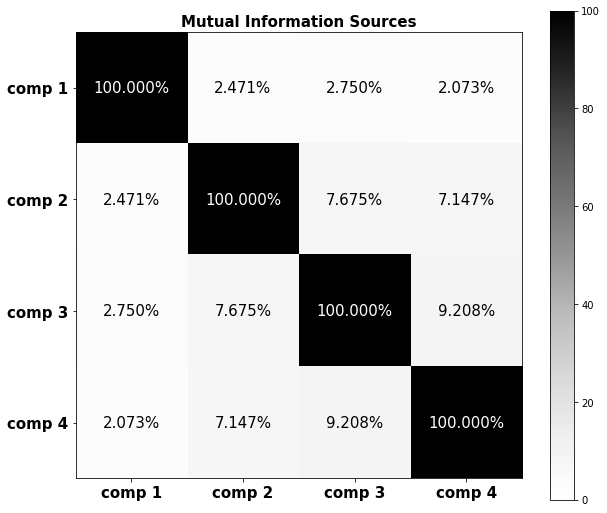

In [28]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run7_sources_MI_1k',save=True)

In [29]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 4
Time to converges the FastICA: 0.004 seconds


In [30]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.02248014,  0.02655673,  0.02771937],
       [ 0.02248014,  1.        ,  0.09000583,  0.08132599],
       [ 0.02655673,  0.09000583,  1.        ,  0.07858895],
       [ 0.02771937,  0.08132599,  0.07858895,  1.        ]])

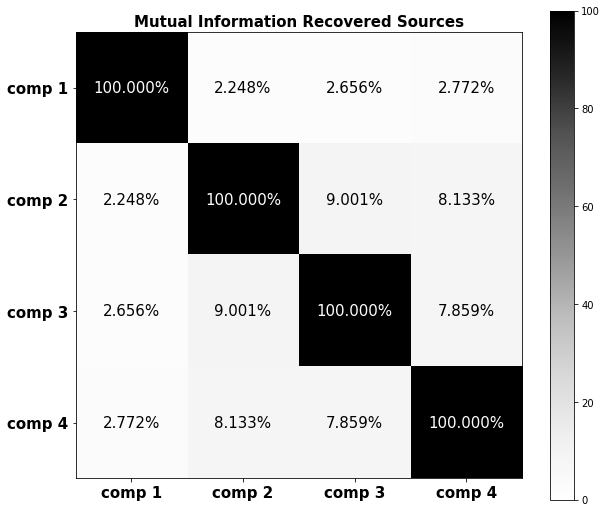

In [31]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run7_reco_MI_1k',save=True)

In [32]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.79977325,  0.02270864,  0.02584161,  0.02466277],
       [ 0.02769653,  0.06762213,  0.08006816,  0.80753077],
       [ 0.0276275 ,  0.09156774,  0.69896071,  0.07510239],
       [ 0.02371332,  0.71961903,  0.0950714 ,  0.07713754]])

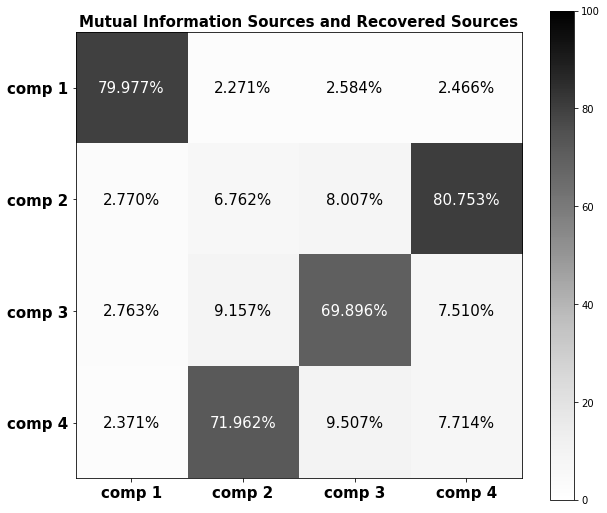

In [33]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run7_sourcesreco_MI_1k',save=True)

In [34]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[3,:]
ordened_recovered_sources[2,:] = recovered_sources[2,:]
ordened_recovered_sources[3,:] = recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.79977325,  0.02466277,  0.02584161,  0.02270864],
       [ 0.02769653,  0.80753077,  0.08006816,  0.06762213],
       [ 0.0276275 ,  0.07510239,  0.69896071,  0.09156774],
       [ 0.02371332,  0.07713754,  0.0950714 ,  0.71961903]])

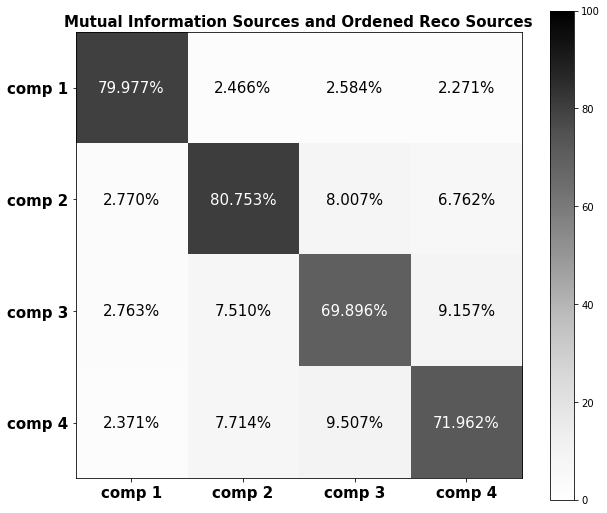

In [35]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run7_sourcesreco_ordened_MI_1k',save=True)

In [36]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [37]:
SKL_div,JS_div

(array([[ 0.08672669,  0.44695016,  0.52155263,  0.61975244],
        [ 0.34828704,  0.03046541,  0.40533233,  0.98866279],
        [ 0.49751592,  0.35819161,  0.70318347,  1.39561516],
        [ 0.50305631,  0.88615539,  0.76461286,  0.63079583]]),
 array([[ 0.04481582,  0.19469123,  0.28876617,  0.27381896],
        [ 0.21504701,  0.01595555,  0.10350902,  0.45494279],
        [ 0.24252003,  0.32486258,  0.34947448,  0.45655044],
        [ 0.30404853,  0.60091241,  0.71530756,  0.30881577]]))

In [38]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.044816 &  0.194691 &  0.288766 &  0.273819 \\
1 &  0.215047 &  0.015956 &  0.103509 &  0.454943 \\
2 &  0.242520 &  0.324863 &  0.349474 &  0.456550 \\
3 &  0.304049 &  0.600912 &  0.715308 &  0.308816 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.086727 &  0.446950 &  0.521553 &  0.619752 \\
1 &  0.348287 &  0.030465 &  0.405332 &  0.988663 \\
2 &  0.497516 &  0.358192 &  0.703183 &  1.395615 \\
3 &  0.503056 &  0.886155 &  0.764613 &  0.630796 \\
\bottomrule
\end{tabular}



In [39]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  1.10000000e+01,   4.00000000e+00,   0.00000000e+00],
       [  6.00000000e-03,   4.00000000e-03,   0.00000000e+00],
       [  7.31215680e+00,   4.40194942e+00,   0.00000000e+00],
       [  3.57505602e+00,   1.52550791e+00,   0.00000000e+00],
       [  7.49545475e+00,   7.50285707e+00,   0.00000000e+00]])

# Using 100K stats

In [40]:
sources = np.loadtxt(source_path+'/'+'SeventhSource100000Stats.txt')

x = np.loadtxt(obs_path+'SeventhMixture100000Stats.txt')


In [41]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.01475879,  0.06375183,  0.03564993],
       [ 0.01475879,  1.        ,  0.01557047,  0.03281515],
       [ 0.06375183,  0.01557047,  1.        ,  0.06694898],
       [ 0.03564993,  0.03281515,  0.06694898,  1.        ]])

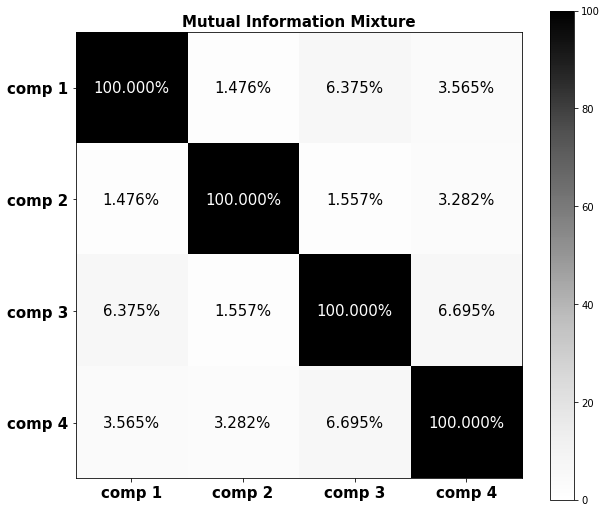

In [42]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run7_mix_MI_100k',save=True)

In [43]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.00302122,  0.00279643,  0.00273504],
       [ 0.00302122,  1.        ,  0.01230897,  0.01331819],
       [ 0.00279643,  0.01230897,  1.        ,  0.01458235],
       [ 0.00273504,  0.01331819,  0.01458235,  1.        ]])

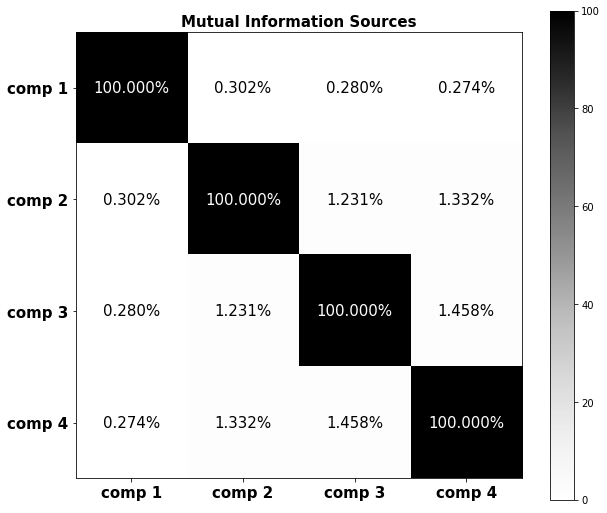

In [44]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run7_sources_MI_100k',save=True)

In [45]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 3
Time to converges the FastICA: 0.222 seconds


In [46]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.0123414 ,  0.00294824,  0.01327401],
       [ 0.0123414 ,  1.        ,  0.00285974,  0.01454362],
       [ 0.00294824,  0.00285974,  1.        ,  0.00281838],
       [ 0.01327401,  0.01454362,  0.00281838,  1.        ]])

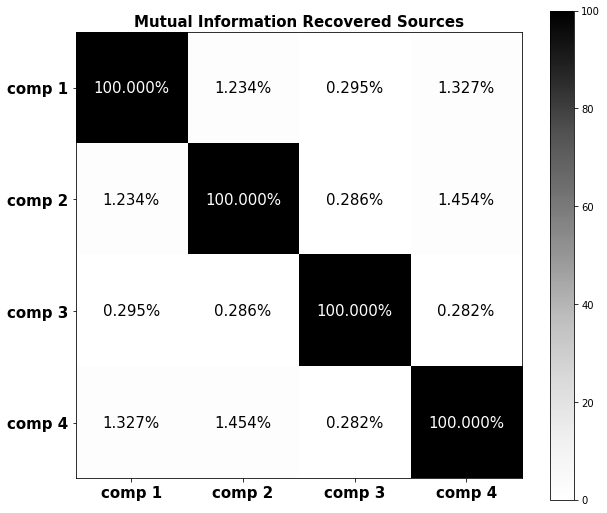

In [47]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run7_reco_MI_100k',save=True)

In [48]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.00297219,  0.00280754,  0.93286187,  0.00273652],
       [ 0.793533  ,  0.01220499,  0.00303452,  0.01349554],
       [ 0.01235285,  0.81885674,  0.00285378,  0.01435591],
       [ 0.01318934,  0.01428935,  0.0028155 ,  0.80333931]])

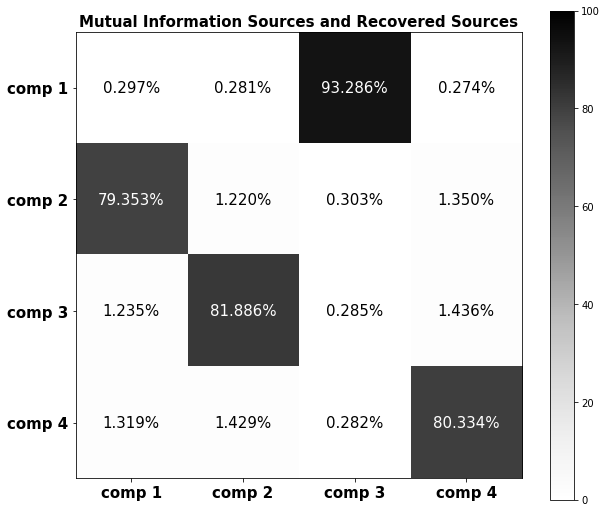

In [49]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run7_sourcesreco_MI_100k',save=True)

In [50]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = recovered_sources[3,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.93286187,  0.00297219,  0.00280754,  0.00273652],
       [ 0.00303452,  0.793533  ,  0.01220499,  0.01349554],
       [ 0.00285378,  0.01235285,  0.81885674,  0.01435591],
       [ 0.0028155 ,  0.01318934,  0.01428935,  0.80333931]])

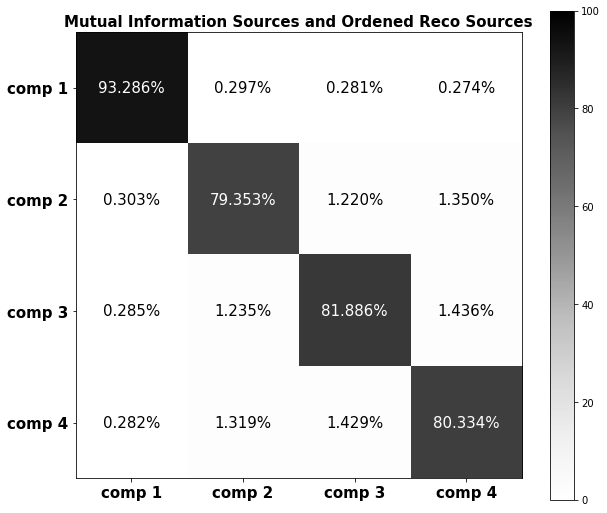

In [51]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run7_sourcesreco_ordened_MI_100k',save=True)

In [52]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [53]:
SKL_div,JS_div

(array([[ 0.02112943,  0.74919892,  0.90594129,  0.88853028],
        [ 0.39496858,  0.01826514,  0.44385056,  1.42956849],
        [ 0.68221989,  0.32046091,  0.52025244,  1.55551931],
        [ 0.5109706 ,  1.53327691,  1.28511742,  0.02110724]]),
 array([[ 0.00993877,  0.20532984,  0.35582146,  0.26717788],
        [ 0.37175924,  0.00962699,  0.17605768,  0.78647958],
        [ 0.45092991,  0.18447249,  0.26001183,  0.5199777 ],
        [ 0.43550072,  0.7183882 ,  0.70442867,  0.01029121]]))

In [54]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.009939 &  0.205330 &  0.355821 &  0.267178 \\
1 &  0.371759 &  0.009627 &  0.176058 &  0.786480 \\
2 &  0.450930 &  0.184472 &  0.260012 &  0.519978 \\
3 &  0.435501 &  0.718388 &  0.704429 &  0.010291 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.021129 &  0.749199 &  0.905941 &  0.888530 \\
1 &  0.394969 &  0.018265 &  0.443851 &  1.429568 \\
2 &  0.682220 &  0.320461 &  0.520252 &  1.555519 \\
3 &  0.510971 &  1.533277 &  1.285117 &  0.021107 \\
\bottomrule
\end{tabular}



In [55]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  1.10000000e+01,   4.00000000e+00,   3.00000000e+00],
       [  6.00000000e-03,   4.00000000e-03,   2.22000000e-01],
       [  7.31215680e+00,   4.40194942e+00,   8.96818798e+00],
       [  3.57505602e+00,   1.52550791e+00,   5.24126298e+00],
       [  7.49545475e+00,   7.50285707e+00,   7.07478572e+00]])

In [56]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &          0 &         1 &         2 \\
\midrule
0 &  11.000000 &  4.000000 &  3.000000 \\
1 &   0.006000 &  0.004000 &  0.222000 \\
2 &   7.312157 &  4.401949 &  8.968188 \\
3 &   3.575056 &  1.525508 &  5.241263 \\
4 &   7.495455 &  7.502857 &  7.074786 \\
\bottomrule
\end{tabular}

